In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime
from dateutil import relativedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_bureau = pd.read_csv('/content/drive/MyDrive/LTV/train_bureau.csv')
df_data = pd.read_csv('/content/drive/MyDrive/LTV/train_Data.csv')

In [ ]:
print('Shape of the bureau data is -',df_bureau.shape)
print('---------------------\n')
print('Features in bureau data are -\n',df_bureau.columns)

Shape of the bureau data is - (560844, 25)
---------------------

Features in bureau data are -
 Index(['ID', 'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
       'DATE-REPORTED', 'OWNERSHIP-IND', 'ACCOUNT-STATUS', 'DISBURSED-DT',
       'CLOSE-DT', 'LAST-PAYMENT-DATE', 'CREDIT-LIMIT/SANC AMT',
       'DISBURSED-AMT/HIGH CREDIT', 'INSTALLMENT-AMT', 'CURRENT-BAL',
       'INSTALLMENT-FREQUENCY', 'OVERDUE-AMT', 'WRITE-OFF-AMT', 'ASSET_CLASS',
       'REPORTED DATE - HIST', 'DPD - HIST', 'CUR BAL - HIST',
       'AMT OVERDUE - HIST', 'AMT PAID - HIST', 'TENURE'],
      dtype='object')


In [ ]:
df_bureau.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [ ]:
print('Shape of the loan data is -',df_data.shape)
print('---------------------\n')
print('Features in loan data are -\n', df_data.columns)

Shape of the loan data is - (128655, 26)
---------------------

Features in loan data are -
 Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')


In [ ]:
df_data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [ ]:
print('Null values in each column of bureau data\n--------------------------------------')
print(df_bureau.isnull().sum())

Null values in each column of bureau data
--------------------------------------
ID                                0
SELF-INDICATOR                    0
MATCH-TYPE                        0
ACCT-TYPE                         0
CONTRIBUTOR-TYPE                  0
DATE-REPORTED                  3683
OWNERSHIP-IND                     0
ACCOUNT-STATUS                    0
DISBURSED-DT                  32150
CLOSE-DT                     251758
LAST-PAYMENT-DATE            319283
CREDIT-LIMIT/SANC AMT        545685
DISBURSED-AMT/HIGH CREDIT         0
INSTALLMENT-AMT              420509
CURRENT-BAL                     233
INSTALLMENT-FREQUENCY        425135
OVERDUE-AMT                  118891
WRITE-OFF-AMT                 19123
ASSET_CLASS                  300376
REPORTED DATE - HIST          19123
DPD - HIST                    19647
CUR BAL - HIST                19123
AMT OVERDUE - HIST            19123
AMT PAID - HIST               20294
TENURE                       368107
dtype: int64


In [ ]:
print('Null values in each column of user data\n--------------------------------------')
print(df_data.isnull().sum())

Null values in each column of user data
--------------------------------------
ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64


In [ ]:
temp=df_bureau.dropna()
print(temp.shape)

(70, 25)


In [ ]:
temp=df_data.dropna()
print(temp.shape)

(107126, 26)


In [ ]:
df_bureau.corr()

,ID,SELF-INDICATOR,WRITE-OFF-AMT,TENURE
ID,1.000000,0.059443,-0.001892,-0.010357
SELF-INDICATOR,0.059443,1.000000,-0.009705,0.051563
WRITE-OFF-AMT,-0.001892,-0.009705,1.000000,-0.000521
TENURE,-0.010357,0.051563,-0.000521,1.000000


In [ ]:
df_data.corr()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
ID,1.000000,0.356918,-0.037452,0.068419,0.101748,0.101704,0.048207,0.476296,0.119325,0.323466,0.071961,-0.053506,0.006471,-0.130078
BranchID,0.356918,1.000000,0.064685,-0.031347,0.035271,0.034626,0.007178,0.131643,0.038933,0.149251,0.075664,-0.004077,0.002880,-0.028319
Tenure,-0.037452,0.064685,1.000000,0.067521,0.366366,0.364736,0.032102,-0.081862,-0.004569,-0.054514,0.416839,0.009127,-0.000535,0.028968
AssetCost,0.068419,-0.031347,0.067521,1.000000,0.597760,0.597570,0.280779,0.208154,-0.274615,0.048930,-0.042816,-0.038535,0.003335,0.179748
AmountFinance,0.101748,0.035271,0.366366,0.597760,1.000000,0.998750,0.365192,0.147898,-0.150179,0.015465,0.708365,-0.030911,0.002330,0.155269
DisbursalAmount,0.101704,0.034626,0.364736,0.597570,0.998750,1.000000,0.369416,0.145549,-0.149885,0.013356,0.708586,-0.030124,0.002351,0.153678
EMI,0.048207,0.007178,0.032102,0.280779,0.365192,0.369416,1.000000,0.040445,-0.064775,-0.045230,0.127281,0.063668,0.001414,-0.049408
AssetID,0.476296,0.131643,-0.081862,0.208154,0.147898,0.145549,0.040445,1.000000,-0.006310,0.493752,-0.000344,-0.055766,0.008559,-0.049980
ManufacturerID,0.119325,0.038933,-0.004569,-0.274615,-0.150179,-0.149885,-0.064775,-0.006310,1.000000,0.082349,0.040099,0.044019,-0.002394,-0.021016
SupplierID,0.323466,0.149251,-0.054514,0.048930,0.015465,0.013356,-0.045230,0.493752,0.082349,1.000000,-0.023777,-0.057484,0.005746,-0.072142


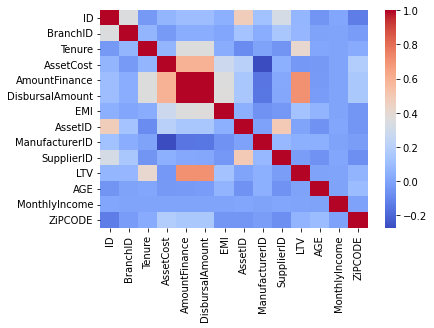

In [ ]:
sns.heatmap(data=df_data.corr(), cmap='coolwarm')

In [ ]:
filtered_bureau = df_bureau.drop(['REPORTED DATE - HIST',
                                  'DPD - HIST',
                                  'CUR BAL - HIST',
                                  'AMT OVERDUE - HIST',
                                  'AMT PAID - HIST'], axis=1)

filtered_bureau.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,NaN


In [ ]:
filtered_bureau.rename(columns={'ID':'id',
                      'SELF-INDICATOR':'self_indicator',
                      'MATCH-TYPE':'match_type',
                      'ACCT-TYPE':'account_type',
                      'CONTRIBUTOR-TYPE':'contributor_type',
                      'DATE-REPORTED':'date_reported', 
                      'OWNERSHIP-IND':'ownership_ind',
                      'ACCOUNT-STATUS':'account_status',
                      'DISBURSED-DT':'disbursed_date',
                      'CLOSE-DT':'close_date',
                      'LAST-PAYMENT-DATE':'last_payment_date',
                      'CREDIT-LIMIT/SANC AMT':'credit_limit_sanction_amount',
                      'DISBURSED-AMT/HIGH CREDIT':'disbursed_amount_high_credit',
                      'INSTALLMENT-AMT':'installment',
                      'CURRENT-BAL':'current_balance',
                      'INSTALLMENT-FREQUENCY':'installment_freq',
                      'OVERDUE-AMT':'overdue_amount',
                      'WRITE-OFF-AMT':'write_off_amount',
                      'ASSET_CLASS':'asset_class',
                      'TENURE':'tenure'}, inplace=True)

In [ ]:
active_bureau = filtered_bureau[filtered_bureau['account_status']=='Active']
active_bureau.head()

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,84.0
11,2,False,PRIMARY,Housing Loan,PRB,2020-01-31 00:00:00,Guarantor,Active,2019-09-30 00:00:00,NaN,2020-01-30 00:00:00,NaN,"38,00,000","31,889/Monthly","37,86,598",F03,0,0.0,Standard,300.0
12,2,False,PRIMARY,Business Loan General,NBF,2019-12-31 00:00:00,Individual,Active,2016-02-29 00:00:00,2999-01-01 00:00:00,2019-12-01 00:00:00,NaN,"7,00,000","17,620/Monthly","52,421",F03,0,0.0,NaN,48.0


In [ ]:
active_bureau.isnull().sum()

id                                   0
self_indicator                       0
match_type                           0
account_type                         0
contributor_type                     0
date_reported                      737
ownership_ind                        0
account_status                       0
disbursed_date                   13802
close_date                      201184
last_payment_date               110840
credit_limit_sanction_amount    194996
disbursed_amount_high_credit         0
installment                     148793
current_balance                    180
installment_freq                151663
overdue_amount                   34831
write_off_amount                 12073
asset_class                     109256
tenure                          132366
dtype: int64

In [ ]:
active_bureau

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,84.0
11,2,False,PRIMARY,Housing Loan,PRB,2020-01-31 00:00:00,Guarantor,Active,2019-09-30 00:00:00,NaN,2020-01-30 00:00:00,NaN,"38,00,000","31,889/Monthly","37,86,598",F03,0,0.0,Standard,300.0
12,2,False,PRIMARY,Business Loan General,NBF,2019-12-31 00:00:00,Individual,Active,2016-02-29 00:00:00,2999-01-01 00:00:00,2019-12-01 00:00:00,NaN,"7,00,000","17,620/Monthly","52,421",F03,0,0.0,NaN,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560838,143393,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2018-11-23 00:00:00,NaN,NaN,NaN,"3,0,733",NaN,"1,42,446",NaN,0,0.0,NaN,NaN
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31 00:00:00,Individual,Active,2017-10-31 00:00:00,NaN,NaN,NaN,"3,0,000",NaN,0,NaN,0,0.0,Standard,24.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31 00:00:00,Guarantor,Active,2016-11-28 00:00:00,NaN,2020-01-16 00:00:00,NaN,"3,93,819",NaN,"1,1,687",NaN,NaN,0.0,Standard,48.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2018-12-20 00:00:00,NaN,NaN,NaN,"2,50,643",NaN,"1,32,487",NaN,0,0.0,NaN,NaN


In [ ]:
active_bureau.head(10)

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,84.0
11,2,False,PRIMARY,Housing Loan,PRB,2020-01-31 00:00:00,Guarantor,Active,2019-09-30 00:00:00,NaN,2020-01-30 00:00:00,NaN,"38,00,000","31,889/Monthly","37,86,598",F03,0,0.0,Standard,300.0
12,2,False,PRIMARY,Business Loan General,NBF,2019-12-31 00:00:00,Individual,Active,2016-02-29 00:00:00,2999-01-01 00:00:00,2019-12-01 00:00:00,NaN,"7,00,000","17,620/Monthly","52,421",F03,0,0.0,NaN,48.0
13,2,False,PRIMARY,Commercial Vehicle Loan,PRB,2019-12-31 00:00:00,Individual,Active,2016-12-31 00:00:00,NaN,2019-12-06 00:00:00,NaN,"7,85,905",NaN,"2,47,887",NaN,0,0.0,Standard,NaN
14,2,False,PRIMARY,Business Loan General,NBF,2019-12-31 00:00:00,Individual,Active,2016-02-29 00:00:00,2999-01-01 00:00:00,2019-12-01 00:00:00,NaN,"30,00,000","74,684/Monthly","2,22,363",F03,0,0.0,NaN,48.0
16,2,False,PRIMARY,Construction Equipment Loan,PRB,2019-12-31 00:00:00,Guarantor,Active,2019-10-29 00:00:00,NaN,2019-12-06 00:00:00,NaN,"46,66,000",NaN,"45,84,553",NaN,0,0.0,Standard,NaN
17,2,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31 00:00:00,Guarantor,Active,2019-09-09 00:00:00,NaN,2020-01-10 00:00:00,NaN,"5,11,000","11,430/Monthly","6,05,783",F03,0,0.0,NaN,58.0
19,2,False,PRIMARY,Commercial Vehicle Loan,NBF,2020-01-31 00:00:00,Individual,Active,2018-12-18 00:00:00,NaN,2020-01-17 00:00:00,NaN,"11,00,000","38,640/Monthly","8,49,852",F03,0,0.0,NaN,35.0


In [ ]:
active_bureau['close_date'].value_counts()

2999-01-01 00:00:00    60
2017-05-31 00:00:00     6
2018-01-19 00:00:00     5
2017-02-28 00:00:00     5
2016-05-16 00:00:00     4
                       ..
2020-01-11 00:00:00     1
2020-11-18 00:00:00     1
2017-01-19 00:00:00     1
2016-06-27 00:00:00     1
2022-11-20 00:00:00     1
Name: close_date, Length: 482, dtype: int64

In [ ]:
type(list(active_bureau['close_date'].loc[active_bureau.id==1].loc[active_bureau.account_type=='Tractor Loan'])[0])

float

In [ ]:
filtered_bureau['date_reported'] = pd.to_datetime(filtered_bureau['date_reported'])
filtered_bureau['disbursed_date'] = pd.to_datetime(filtered_bureau['disbursed_date'])
filtered_bureau['close_date'] = pd.to_datetime(filtered_bureau['close_date'], errors='coerce')
filtered_bureau['last_payment_date'] = pd.to_datetime(filtered_bureau['last_payment_date'])

In [ ]:
filtered_bureau['account_status'].value_counts()

Closed                         320255
Active                         201897
Delinquent                      32457
Written Off                      2937
Suit Filed                       2062
Settled                           626
Restructured                      511
SUIT FILED (WILFUL DEFAULT)        70
WILFUL DEFAULT                     27
Cancelled                           1
Sold/Purchased                      1
Name: account_status, dtype: int64

In [ ]:
date1 = '12-10-2023'
date2 = '13-10-2024'

d1 = datetime.strptime(date1, '%d-%m-%Y')
d2 = datetime.strptime(date2, '%d-%m-%Y')
delta = relativedelta.relativedelta(d2, d1)

print('{} months {} days'.format(delta.months+(delta.years*12), delta.days))

12 months 1 days


In [ ]:
diff = filtered_bureau['close_date']-filtered_bureau['disbursed_date']
filtered_bureau

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaT,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaT,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaT,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,NaT,NaT,NaN,"2,50,000",NaN,0,NaN,0,0.0,Standard,12.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,NaT,NaT,NaN,"3,0,000",NaN,0,NaN,0,0.0,Standard,24.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,NaT,2020-01-16,NaN,"3,93,819",NaN,"1,1,687",NaN,NaN,0.0,Standard,48.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,NaT,NaT,NaN,"2,50,643",NaN,"1,32,487",NaN,0,0.0,NaN,NaN


In [ ]:
start_date = filtered_bureau['disbursed_date']
end_date = filtered_bureau['close_date']
diff=[]

for i in range(len(start_date)):
  try:
    delta = relativedelta.relativedelta(end_date[i],start_date[i])
    diff.append(int(delta.months+(delta.years*12)))
  except:
    diff.append(None)

In [ ]:
filtered_bureau['closure_in_months'] = diff

In [ ]:
type(diff[0])

NoneType

In [ ]:
filtered_bureau[['id', 'account_status','disbursed_date','close_date','tenure','closure_in_months']]

,id,account_status,disbursed_date,close_date,tenure,closure_in_months
0,1,Delinquent,2015-10-05,NaT,NaN,NaN
1,1,Active,2018-03-19,NaT,36.0,NaN
2,1,Active,2019-08-30,NaT,NaN,NaN
3,1,Closed,2013-09-27,2017-09-21,NaN,47.0
4,1,Closed,2012-02-10,2016-02-01,NaN,47.0
...,...,...,...,...,...,...
560839,143393,Closed,NaT,NaT,12.0,NaN
560840,143393,Active,2017-10-31,NaT,24.0,NaN
560841,143393,Active,2016-11-28,NaT,48.0,NaN
560842,143394,Active,2018-12-20,NaT,NaN,NaN


In [ ]:
filtered_bureau.loc[(filtered_bureau.tenure-filtered_bureau.closure_in_months)>=12]

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,...,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
57,8,False,PRIMARY,Commercial Vehicle Loan,NBF,2019-12-31,Guarantor,SUIT FILED (WILFUL DEFAULT),2016-12-31,2018-08-07,...,NaN,"1,91,241","1,865/Monthly",0,F03,0,0.0,Standard,42.0,19.0
60,8,False,PRIMARY,Personal Loan,NAB,2016-12-31,Individual,Closed,2014-10-24,2015-10-17,...,NaN,"1,00,000","2,301/Monthly",0,F03,NaN,0.0,Standard,60.0,11.0
85,11,False,PRIMARY,Tractor Loan,NBF,2019-10-31,Guarantor,Closed,2012-01-31,2014-02-07,...,NaN,"5,25,000",NaN,0,NaN,NaN,0.0,Standard,48.0,24.0
132,20,False,PRIMARY,Personal Loan,NAB,2016-12-31,Individual,Closed,2007-05-17,2009-03-20,...,NaN,"2,60,000","6,943/Monthly",0,F03,NaN,0.0,Standard,48.0,22.0
141,21,False,PRIMARY,Business Loan Priority Sector Agriculture,NAB,2019-12-31,Individual,Closed,2018-06-27,2019-12-31,...,NaN,"12,00,000","24,268/Monthly","6,08,860",F03,"1,15,068",0.0,SubStandard,78.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560619,143284,False,PRIMARY,Auto Loan (Personal),NBF,2019-10-31,Individual,Closed,2014-08-30,2016-01-29,...,NaN,"5,28,290",NaN,0,NaN,NaN,0.0,Standard,36.0,16.0
560622,143284,False,PRIMARY,Auto Loan (Personal),NBF,2019-10-31,Individual,Closed,2017-03-30,2019-04-06,...,NaN,"9,90,000",NaN,0,NaN,NaN,0.0,Standard,45.0,24.0
560692,143314,False,PRIMARY,Auto Loan (Personal),NAB,2017-08-31,Individual,Closed,2015-04-28,2017-08-27,...,NaN,"7,00,000","11,730/Monthly",0,F03,NaN,0.0,Standard,84.0,27.0
560696,143314,False,PRIMARY,Auto Loan (Personal),NAB,2017-08-31,Individual,Closed,2015-04-28,2017-08-27,...,NaN,"7,0,000","11,730/Monthly",0,F03,NaN,0.0,Standard,84.0,27.0


In [ ]:
grouped_bureau=filtered_bureau.groupby('id')
grouped_bureau.first()

,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
id,,,,,,,,,,,,,,,,,,,,
1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,2017-09-21,2018-02-27,"50,000","37,352","1,405/Monthly","37,873",F03,"37,873",0.0,Standard,36.0,47.0
2,False,PRIMARY,Overdraft,PRB,2017-03-31,Individual,Closed,2016-01-15,2017-03-27,2017-03-27,None,"17,00,000","31,889/Monthly",0,F03,0,0.0,Standard,300.0,14.0
3,True,PRIMARY,Two-Wheeler Loan,NBF,2016-11-30,Individual,Closed,2019-06-28,2016-11-17,2019-12-31,"10,000","40,000","18,192/Monthly",0,F03,0,0.0,Standard,84.0,10.0
7,True,PRIMARY,Tractor Loan,NBF,2017-11-30,Individual,Closed,2013-11-29,2017-11-22,2019-12-31,None,"4,00,000","5,571/Monthly",0,F03,0,0.0,None,10.0,47.0
8,False,PRIMARY,Commercial Vehicle Loan,NBF,2019-12-31,Guarantor,SUIT FILED (WILFUL DEFAULT),2016-12-31,2018-08-07,2019-06-30,None,"1,91,241","1,865/Monthly",0,F03,0,0.0,Standard,42.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143390,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-09-21,NaT,2019-12-09,None,"2,65,601",None,"71,057",None,0,0.0,None,121.0,NaN
143391,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-09-22,NaT,NaT,None,"2,75,630",None,"73,890",None,0,0.0,None,NaN,NaN
143393,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-11-23,NaT,2020-01-16,None,"3,0,733",None,"1,42,446",None,0,0.0,Standard,12.0,NaN


In [ ]:
grouped_bureau.head([5])

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,...,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaT,...,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,NaN,NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaT,...,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0,NaN
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaT,...,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN,NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21,...,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,NaN,47.0
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01,...,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,NaN,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,NaT,...,NaN,"2,50,000",NaN,0,NaN,0,0.0,Standard,12.0,NaN
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,NaT,...,NaN,"3,0,000",NaN,0,NaN,0,0.0,Standard,24.0,NaN
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,NaT,...,NaN,"3,93,819",NaN,"1,1,687",NaN,NaN,0.0,Standard,48.0,NaN
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,NaT,...,NaN,"2,50,643",NaN,"1,32,487",NaN,0,0.0,NaN,NaN,NaN


In [ ]:
grouped_bureau.tail([5])

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,...,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01,...,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,NaN,47.0
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30,Individual,Closed,2018-01-11,2018-03-13,...,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,NaN,2.0
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-11-15,NaT,...,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,84.0,NaN
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-01-30,2017-09-21,...,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,NaN,55.0
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31,Individual,Closed,2013-06-11,2017-07-01,...,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,NaN,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,NaT,...,NaN,"2,50,000",NaN,0,NaN,0,0.0,Standard,12.0,NaN
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,NaT,...,NaN,"3,0,000",NaN,0,NaN,0,0.0,Standard,24.0,NaN
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,NaT,...,NaN,"3,93,819",NaN,"1,1,687",NaN,NaN,0.0,Standard,48.0,NaN
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,NaT,...,NaN,"2,50,643",NaN,"1,32,487",NaN,0,0.0,NaN,NaN,NaN


In [ ]:
filtered_bureau.loc[filtered_bureau.id==1]

,id,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,...,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaT,...,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,NaN,NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaT,...,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,36.0,NaN
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaT,...,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,NaN,NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21,...,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,NaN,47.0
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01,...,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,NaN,47.0
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30,Individual,Closed,2018-01-11,2018-03-13,...,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,NaN,2.0
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-11-15,NaT,...,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,84.0,NaN
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-01-30,2017-09-21,...,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,NaN,55.0
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31,Individual,Closed,2013-06-11,2017-07-01,...,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,NaN,48.0


In [ ]:
grouped_bureau.count()

,self_indicator,match_type,account_type,contributor_type,date_reported,ownership_ind,account_status,disbursed_date,close_date,last_payment_date,credit_limit_sanction_amount,disbursed_amount_high_credit,installment,current_balance,installment_freq,overdue_amount,write_off_amount,asset_class,tenure,closure_in_months
id,,,,,,,,,,,,,,,,,,,,
1,9,9,9,9,9,9,9,9,5,3,1,9,2,9,2,6,9,4,2,5
2,13,13,13,13,13,13,13,13,6,12,0,13,5,13,5,12,13,6,7,6
3,31,31,31,31,30,31,31,18,12,14,7,31,6,31,6,27,31,8,8,6
7,4,4,4,4,4,4,4,4,2,1,0,4,1,4,1,4,4,0,2,2
8,7,7,7,7,7,7,7,7,3,2,0,7,3,7,3,5,7,3,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143390,2,2,2,2,2,2,2,2,0,1,0,2,0,2,0,2,2,0,1,0
143391,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,1,0,0,0
143393,4,4,4,4,4,4,4,3,0,1,0,4,0,4,0,3,4,3,3,0


In [ ]:
grouped_bureau.count().max()

self_indicator                  420
match_type                      420
account_type                    420
contributor_type                420
date_reported                   420
ownership_ind                   420
account_status                  420
disbursed_date                  420
close_date                      218
last_payment_date               418
credit_limit_sanction_amount    142
disbursed_amount_high_credit    420
installment                      96
current_balance                 420
installment_freq                 76
overdue_amount                  371
write_off_amount                420
asset_class                     283
tenure                          143
closure_in_months               218
dtype: int64

In [ ]:
grouped_bureau.count().idxmax(axis=0)

self_indicator                  71060
match_type                      71060
account_type                    71060
contributor_type                71060
date_reported                   71060
ownership_ind                   71060
account_status                  71060
disbursed_date                  71060
close_date                      71060
last_payment_date               71060
credit_limit_sanction_amount    51786
disbursed_amount_high_credit    71060
installment                     97794
current_balance                 71060
installment_freq                97794
overdue_amount                  71060
write_off_amount                71060
asset_class                     71060
tenure                          51786
closure_in_months               71060
dtype: int64

In [ ]:
grouped_bureau.aggregate(['mean'])

,self_indicator,date_reported,disbursed_date,close_date,last_payment_date,write_off_amount,tenure,closure_in_months
,mean,mean,mean,mean,mean,mean,mean,mean
id,,,,,,,,
1,0.555556,2018-06-10 10:40:00.000000000,2015-11-17 13:20:00.000000000,2017-06-11 14:24:00,2019-05-11 16:00:00.000000000,0.0,60.000000,39.800000
2,0.076923,2019-01-29 12:55:23.076923136,2016-07-09 12:55:23.076923136,2017-01-16 08:00:00,2018-10-09 00:00:00.000000000,0.0,80.714286,29.500000
3,0.064516,2018-09-16 13:36:00.000000000,2016-03-28 09:20:00.000000000,2018-01-26 02:00:00,2019-04-06 05:08:34.285714176,0.0,56.750000,18.833333
7,0.500000,2019-03-24 12:00:00.000000000,2017-05-13 18:00:00.000000000,2018-05-27 12:00:00,2019-12-31 00:00:00.000000000,0.0,16.500000,25.500000
8,0.142857,2018-12-22 06:51:25.714285824,2016-04-09 06:51:25.714285824,2016-08-26 08:00:00,2019-09-28 00:00:00.000000000,0.0,39.333333,24.333333
...,...,...,...,...,...,...,...,...
143390,0.500000,2020-01-15 12:00:00.000000000,2019-03-12 00:00:00.000000000,NaT,2019-12-09 00:00:00.000000000,0.0,121.000000,NaN
143391,1.000000,2020-01-31 00:00:00.000000000,2018-09-22 00:00:00.000000000,NaT,NaT,0.0,NaN,NaN


In [ ]:
aggregated_mean_bureau = grouped_bureau.aggregate(['mean'])
aggregated_mean_bureau = aggregated_mean_bureau.reset_index()

In [ ]:
aggregated_mean_bureau

,id,self_indicator,date_reported,disbursed_date,close_date,last_payment_date,write_off_amount,tenure,closure_in_months
,,mean,mean,mean,mean,mean,mean,mean,mean
0,1,0.555556,2018-06-10 10:40:00.000000000,2015-11-17 13:20:00.000000000,2017-06-11 14:24:00,2019-05-11 16:00:00.000000000,0.0,60.000000,39.800000
1,2,0.076923,2019-01-29 12:55:23.076923136,2016-07-09 12:55:23.076923136,2017-01-16 08:00:00,2018-10-09 00:00:00.000000000,0.0,80.714286,29.500000
2,3,0.064516,2018-09-16 13:36:00.000000000,2016-03-28 09:20:00.000000000,2018-01-26 02:00:00,2019-04-06 05:08:34.285714176,0.0,56.750000,18.833333
3,7,0.500000,2019-03-24 12:00:00.000000000,2017-05-13 18:00:00.000000000,2018-05-27 12:00:00,2019-12-31 00:00:00.000000000,0.0,16.500000,25.500000
4,8,0.142857,2018-12-22 06:51:25.714285824,2016-04-09 06:51:25.714285824,2016-08-26 08:00:00,2019-09-28 00:00:00.000000000,0.0,39.333333,24.333333
...,...,...,...,...,...,...,...,...,...
128650,143390,0.500000,2020-01-15 12:00:00.000000000,2019-03-12 00:00:00.000000000,NaT,2019-12-09 00:00:00.000000000,0.0,121.000000,NaN
128651,143391,1.000000,2020-01-31 00:00:00.000000000,2018-09-22 00:00:00.000000000,NaT,NaT,0.0,NaN,NaN
128652,143393,0.250000,2020-01-15 12:00:00.000000000,2017-11-17 00:00:00.000000000,NaT,2020-01-16 00:00:00.000000000,0.0,28.000000,NaN


In [ ]:
temp = list(aggregated_mean_bureau['self_indicator']['mean'].round(3))
aggregated_mean_bureau['self_indicator']['mean'] = temp

<ipython-input-42-ee8824b65a56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_mean_bureau['self_indicator']['mean'] = temp


In [ ]:
aggregated_mean_bureau['self_indicator_mean'] = temp

In [ ]:
aggregated_mean_bureau.drop(['self_indicator'], axis=1, inplace=True)
aggregated_mean_bureau

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,id,date_reported,disbursed_date,close_date,last_payment_date,write_off_amount,tenure,closure_in_months,self_indicator_mean
,,mean,mean,mean,mean,mean,mean,mean,
0,1,2018-06-10 10:40:00.000000000,2015-11-17 13:20:00.000000000,2017-06-11 14:24:00,2019-05-11 16:00:00.000000000,0.0,60.000000,39.800000,0.556
1,2,2019-01-29 12:55:23.076923136,2016-07-09 12:55:23.076923136,2017-01-16 08:00:00,2018-10-09 00:00:00.000000000,0.0,80.714286,29.500000,0.077
2,3,2018-09-16 13:36:00.000000000,2016-03-28 09:20:00.000000000,2018-01-26 02:00:00,2019-04-06 05:08:34.285714176,0.0,56.750000,18.833333,0.065
3,7,2019-03-24 12:00:00.000000000,2017-05-13 18:00:00.000000000,2018-05-27 12:00:00,2019-12-31 00:00:00.000000000,0.0,16.500000,25.500000,0.500
4,8,2018-12-22 06:51:25.714285824,2016-04-09 06:51:25.714285824,2016-08-26 08:00:00,2019-09-28 00:00:00.000000000,0.0,39.333333,24.333333,0.143
...,...,...,...,...,...,...,...,...,...
128650,143390,2020-01-15 12:00:00.000000000,2019-03-12 00:00:00.000000000,NaT,2019-12-09 00:00:00.000000000,0.0,121.000000,NaN,0.500
128651,143391,2020-01-31 00:00:00.000000000,2018-09-22 00:00:00.000000000,NaT,NaT,0.0,NaN,NaN,1.000
128652,143393,2020-01-15 12:00:00.000000000,2017-11-17 00:00:00.000000000,NaT,2020-01-16 00:00:00.000000000,0.0,28.000000,NaN,0.250


In [ ]:
x = aggregated_mean_bureau['date_reported']['mean'].astype('M8[D]')
x_df = pd.DataFrame(data=x.values, columns=['date'])
#x_df
x_df['date'] = x_df['date'].astype(str)

In [ ]:
aggregated_mean_bureau.drop(['date_reported'], axis=1, inplace=True)
aggregated_mean_bureau['date_reported_mean'] = x_df['date'].values

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
x = aggregated_mean_bureau['disbursed_date']['mean'].astype('M8[D]')
x_df = pd.DataFrame(data=x.values, columns=['date'])
#x_df
x_df['date'] = x_df['date'].astype(str)

aggregated_mean_bureau.drop(['disbursed_date'], axis=1, inplace=True)
aggregated_mean_bureau['disbursed_date_mean'] = x_df['date'].values

In [ ]:
x = aggregated_mean_bureau['close_date']['mean'].astype('M8[D]')
x_df = pd.DataFrame(data=x.values, columns=['date'])
#x_df
x_df['date'] = x_df['date'].astype(str)

aggregated_mean_bureau.drop(['close_date'], axis=1, inplace=True)
aggregated_mean_bureau['close_date_mean'] = x_df['date'].values

In [ ]:
x = aggregated_mean_bureau['last_payment_date']['mean'].astype('M8[D]')
x_df = pd.DataFrame(data=x.values, columns=['date'])
#x_df
x_df['date'] = x_df['date'].astype(str)

aggregated_mean_bureau.drop(['last_payment_date'], axis=1, inplace=True)
aggregated_mean_bureau['last_payment_date_mean'] = x_df['date'].values

In [ ]:
temp = list(aggregated_mean_bureau['write_off_amount']['mean'].round(3))

aggregated_mean_bureau['write_off_amount_mean'] = temp

aggregated_mean_bureau.drop(['write_off_amount'], axis=1, inplace=True)

In [ ]:
temp = list(aggregated_mean_bureau['tenure']['mean'].round(3))

aggregated_mean_bureau['tenure_mean'] = temp

aggregated_mean_bureau.drop(['tenure'], axis=1, inplace=True)

In [ ]:
temp = list(aggregated_mean_bureau['closure_in_months']['mean'].round(3))

aggregated_mean_bureau['closure_in_months_mean'] = temp

aggregated_mean_bureau.drop(['closure_in_months'], axis=1, inplace=True)
aggregated_mean_bureau

,id,self_indicator_mean,date_reported_mean,disbursed_date_mean,close_date_mean,last_payment_date_mean,write_off_amount_mean,tenure_mean,closure_in_months_mean
,,,,,,,,,
0,1,0.556,2018-06-10,2015-11-17,2017-06-11,2019-05-11,0.0,60.000,39.800
1,2,0.077,2019-01-29,2016-07-09,2017-01-16,2018-10-09,0.0,80.714,29.500
2,3,0.065,2018-09-16,2016-03-28,2018-01-26,2019-04-06,0.0,56.750,18.833
3,7,0.500,2019-03-24,2017-05-13,2018-05-27,2019-12-31,0.0,16.500,25.500
4,8,0.143,2018-12-22,2016-04-09,2016-08-26,2019-09-28,0.0,39.333,24.333
...,...,...,...,...,...,...,...,...,...
128650,143390,0.500,2020-01-15,2019-03-12,NaT,2019-12-09,0.0,121.000,NaN
128651,143391,1.000,2020-01-31,2018-09-22,NaT,NaT,0.0,NaN,NaN
128652,143393,0.250,2020-01-15,2017-11-17,NaT,2020-01-16,0.0,28.000,NaN


In [ ]:
aggregated_mean_bureau.to_csv('Aggregated_Values.csv')

In [ ]:
df_data.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,...,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,...,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,...,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,...,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,...,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [ ]:
df_data.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [ ]:
df_data.rename(columns={'ID':'id',
                'Frequency':'frequency',
                'InstlmentMode':'installment_mode',
                'LoanStatus':'loan_status',
                'PaymentMode':'payment_mode',
                'BranchID':'branch_id',
                'Area':'area',
                'Tenure':'tenure',
                'AssetCost':'asset_cost', 
                'AmountFinance':'amount_finance',
                'DisbursalAmount':'disbursal_amount',
                'EMI':'emi',
                'DisbursalDate':'disbursal_date', 
                'MaturityDAte':'maturity_date',
                'AuthDate':'auth_date',
                'AssetID':'asset_id', 
                'ManufacturerID':'manufacturer_id', 
                'SupplierID':'supplier_id', 
                'LTV':'ltv',
                'SEX':'sex', 
                'AGE':'age',
                'MonthlyIncome':'monthly_income',
                'City':'city',
                'State':'state', 
                'ZiPCODE':'zipcode',
                'Top-Up Month':'top_up_month'}, inplace=True)

In [ ]:
df_data.shape

(128655, 26)

In [ ]:
merged = df_data.merge(aggregated_mean_bureau, on='id', how='left')
merged.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,id,frequency,installment_mode,loan_status,payment_mode,branch_id,area,tenure,asset_cost,amount_finance,...,zipcode,Top-up Month,"(self_indicator_mean, )","(date_reported_mean, )","(disbursed_date_mean, )","(close_date_mean, )","(last_payment_date_mean, )","(write_off_amount_mean, )","(tenure_mean, )","(closure_in_months_mean, )"
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,464993.0,> 48 Months,0.556,2018-06-10,2015-11-17,2017-06-11,2019-05-11,0.0,60.000,39.800
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,466001.0,No Top-up Service,0.077,2019-01-29,2016-07-09,2017-01-16,2018-10-09,0.0,80.714,29.500
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,462030.0,12-18 Months,0.065,2018-09-16,2016-03-28,2018-01-26,2019-04-06,0.0,56.750,18.833
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,473335.0,> 48 Months,0.500,2019-03-24,2017-05-13,2018-05-27,2019-12-31,0.0,16.500,25.500
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,495442.0,36-48 Months,0.143,2018-12-22,2016-04-09,2016-08-26,2019-09-28,0.0,39.333,24.333


In [ ]:
aggregated_mean_bureau.columns

MultiIndex([(                    'id', ''),
            (   'self_indicator_mean', ''),
            (    'date_reported_mean', ''),
            (   'disbursed_date_mean', ''),
            (       'close_date_mean', ''),
            ('last_payment_date_mean', ''),
            ( 'write_off_amount_mean', ''),
            (           'tenure_mean', ''),
            ('closure_in_months_mean', '')],
           )

In [ ]:
aggregated_mean_bureau.head(10)

,id,self_indicator_mean,date_reported_mean,disbursed_date_mean,close_date_mean,last_payment_date_mean,write_off_amount_mean,tenure_mean,closure_in_months_mean
,,,,,,,,,
0,1,0.556,2018-06-10,2015-11-17,2017-06-11,2019-05-11,0.0,60.000,39.800
1,2,0.077,2019-01-29,2016-07-09,2017-01-16,2018-10-09,0.0,80.714,29.500
2,3,0.065,2018-09-16,2016-03-28,2018-01-26,2019-04-06,0.0,56.750,18.833
3,7,0.500,2019-03-24,2017-05-13,2018-05-27,2019-12-31,0.0,16.500,25.500
4,8,0.143,2018-12-22,2016-04-09,2016-08-26,2019-09-28,0.0,39.333,24.333
5,9,1.000,2015-12-31,2011-12-19,2015-12-16,NaT,0.0,NaN,47.000
6,10,0.333,2018-08-10,2014-10-11,2016-11-17,2018-08-31,0.0,47.000,47.000
7,11,0.040,2019-04-16,2015-04-16,2016-03-25,2017-07-18,0.0,67.200,33.941
8,12,1.000,2016-01-31,2012-03-29,2016-01-13,NaT,0.0,NaN,45.000
